In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, IBMQ, execute

def ThreeBitDecrementer2():
    q = QuantumRegister(4)
    myCircuit = QuantumCircuit(q)
    myCircuit.cx(2,3)
    myCircuit.x(2)
    myCircuit.cx(2,3)
    myCircuit.x(2)
    myCircuit.cx(3,2)
    myCircuit.ccx(3,2,1)
    return myCircuit
    

In [9]:
dec = ThreeBitDecrementer2().to_gate()
cdec = dec.control()

In [1]:
#Generalize the algorithm? We can implement a for loop which implements mct's until n is 3
def ThreeBitIncrementer(myCircuit):
    myCircuit.ccx(3,2,1)
    myCircuit.cx(3,2)
    myCircuit.x(2)
    myCircuit.cx(2,3)
    myCircuit.x(2)
    myCircuit.cx(2,3)
    return myCircuit
    

In [2]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, IBMQ, execute
def ThreeBitDecrementer(myCircuit):
    myCircuit.cx(2,3)
    myCircuit.x(2)
    myCircuit.cx(2,3)
    myCircuit.x(2)
    myCircuit.cx(3,2)
    myCircuit.ccx(3,2,1)
    return myCircuit

In [3]:
dec = ThreeBitDecrementer(QuantumCircuit(4)).to_gate()
cdec = dec.control()
print(cdec.num_qubits)

5


In [4]:
inc = ThreeBitIncrementer(QuantumCircuit(4)).to_gate()
cinc = inc.control()

In [5]:
def CoinFlipTransformation(qreg,myCircuit):
    myCircuit.h(qreg[0])
    myCircuit.append(cinc, qargs=qreg)
    myCircuit.x(qreg[0])
    myCircuit.append(cdec, qargs=qreg)
    myCircuit.x(qreg[0])
    
    
    

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, IBMQ, execute
n = 5
qreg = QuantumRegister(n)
creg = ClassicalRegister(n)
myCircuit = QuantumCircuit(qreg,creg)

for i in range (2):
    #for j in range (n, 3, -1):
        
        
    CoinFlipTransformation(qreg, myCircuit)
myCircuit.measure(qreg,creg)

job = execute(myCircuit, backend = Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(myCircuit)

# print the reverse of the outcome
for outcome in counts:
    reverse_outcome = ''
    for i in outcome:
        reverse_outcome = i + reverse_outcome
    print(reverse_outcome, "is observed", counts[outcome], "times")
    

00110 is observed 21 times
00000 is observed 25 times
10010 is observed 30 times
10000 is observed 24 times


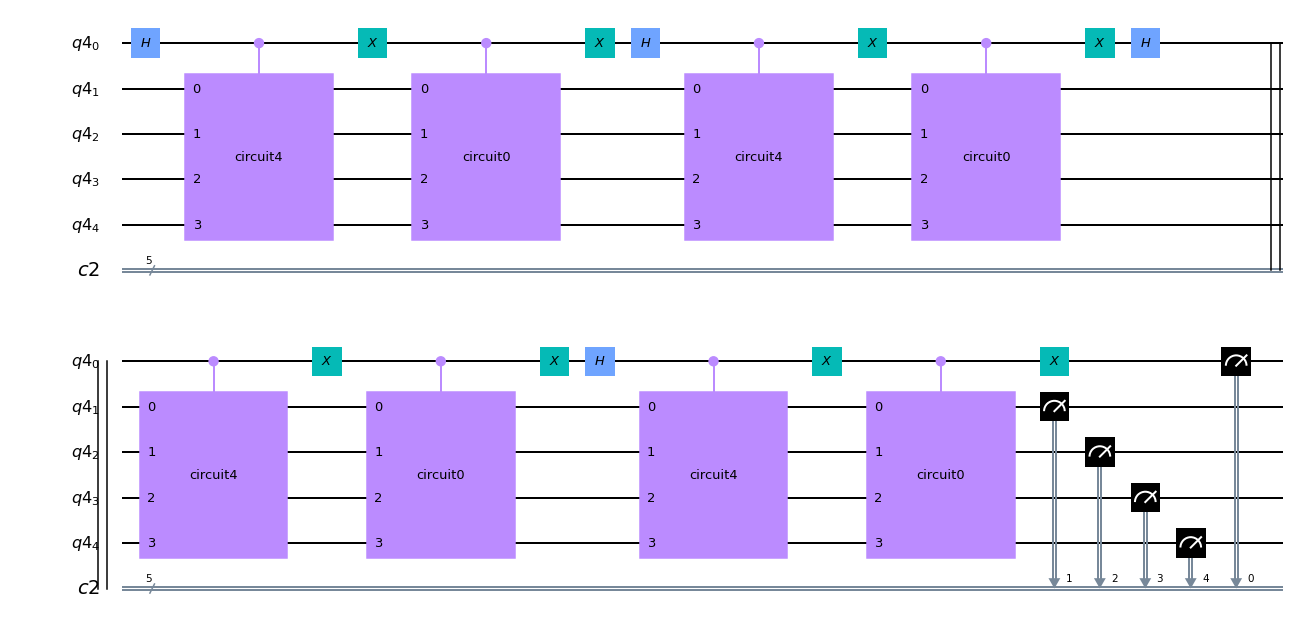

In [10]:
    myCircuit.draw(output='mpl')